# Workbook #2: OLS Regression
This workbook focuses on a principle regression model---ordinary least squares (OLS).

Learning outcomes:
* Students will be able to identify the key components to statistical modeling
* Students will learn OLS regression including assumptions
* Students will be calculate these models using Stata software
* Students will learn to cheak common regression model diagnostics

# Statistics is about showing differences
Statistics was developed to show difference and was popularized by eugentic research. As we discussed in Week 1, statistics can also by story-telling through numbers and from an equitible perspective. 

# Descriptive and Inferential Statistics
In social statistics, we are using variables to assess social issues or social patterns. Descriptive statistics usually involves describing 1-3 variables using "basic" statistics like count, average, range, etc.. Inferential statistics involves modeling to say the sample is representative of the general population. We use modeling to assess these important topics from social theory or case studies. The following things are important to consider when modeling:
* Dependent variable - the variable we are interested in explaining
* Independent variable - the predictor variable, the variable we want to show is important in explaining the dependent variable.
* Shape of the relationship - linear, curvilinear, exponential, etc...
* Direction of the relationship - positive, negative, zero
* How likely is the relationship is due to "truth" and not random chance - statistical significant

We model relationships in society to explain/evaluate social theories or case studies. We use hypothesis testing and regression to examine those models or relationships.

### Ordinary Least Squares Regression


<center>$Y_{i} = \beta_{0} + \beta_{1}(x_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable, the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the independent variable or predictor variable (slope)

$x_{i}$ is the value of $\beta_{1}$ for observation $i$
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

### Assumptions of OLS model:
* Linearity -- When we are estimating the model based on the data, we assume linear relationship among y and x therefore the linear model will have the lowest error. So, that means our model is assuming a linear relationship; in other words the relationship must be linear among the parameters (y & $\beta_1$). Mathematically this means that in order for the errors to have expected value be zero: $E(\epsilon|X) = 0$ then $E(Y | X) = \beta_{0} + \beta_{1}(x) $
* Independence -- We have data from a random sample from the population.
* Sample variation of nonzero -- There needs to be variation in the data in order to calculate and estimate the model. Mathematically this means $Var(x) \ne 0 $
    * In some ways, this assumption is related to independent and identically distributed (i.i.d) meaning each observation is independent of each other (meanining the errors don't correlate with each other: $Cov(\epsilon_i , \epsilon_j| X) =0$) and must represent the identical sampling distribution (the normal distribution). 
* Zero conditional mean -- The model assumes the error term of the population have a zero mean given any values of independent variables: $E(e|x) = E(e) = 0$
* Homoscedasticity -- equal variance across observations: $Var(\epsilon|X) = \sigma^{2}$
* Normality -- The errors are normally distrbuted: $\epsilon_{i}$ ~ $N(0, \sigma^{2}_{\epsilon})$

For regression diagonistics, they can be done either visually or through a test. Also, there are many ways to look at this.

### In-class example with crime data
This data is state-level violent crime data. The unit of analysis is states. The variables are: violent crime rate, murde rate, metropolitan (%), white residents (%), high-school graduate (%), poverty, and single parents (%).

In [67]:
import delimited "D:\documents copy\research\Practice\extract\nhgis\nhgis0138_csv\nhgis0138_ds172_2010_state.csv", clear
describe


(74 vars, 52 obs)


Contains data
  obs:            52                          
 vars:            74                          
 size:         9,672                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
gisjoin         str4    %9s                   GISJOIN
year            int     %8.0g                 YEAR
stusab          str2    %9s                   STUSAB
regiona         byte    %8.0g                 REGIONA
divisiona       byte    %8.0g                 DIVISIONA
state           str20   %20s                  STATE
statea          byte    %8.0g                 STATEA
countya         byte    %8.0g                 COUNTYA
cousuba         byte    %8.0g                 COUSUBA
cousubcc        byte    %8.0g                 COUSUBCC
placea          byte    

In [68]:
*Make sure to review the codebook to get a breakdown of the variables
rename h7z001 tot
rename h7z002 nt_lat
rename h7z003 wht_ntl
rename h7z004 blk_ntl
rename h7z005 ami_ntl
rename h7z006 asn_ntl
rename h7z007 hawpac_ntl
rename h7z008 other_ntl
rename h7z009 multirace_ntl
rename h7z010 lat
rename h7z011 wht
rename h7z012 blk
rename h7z013 ami
rename h7z014 asn
rename h7z015 hawpac
rename h7z016 other
rename h7z017 multirace

In [69]:
*We could also do a foreach loop
gen latper=100*(lat/tot)
gen whtper=100*((wht_ntl+wht)/tot)
gen blkper=100*((blk_ntl+blk)/tot)
gen amiper=100*((ami_ntl+ami)/tot)
gen asnper=100*((asn_ntl+asn)/tot)
gen hawpacper=100*((hawpac_ntl+hawpac)/tot)
gen otherper=100*((other_ntl+other)/tot)
gen multiraceper=100*((multirace_ntl+multirace)/tot)

In [70]:
*I only want to keep relevant variables
keep name statea latper-multiraceper

In [71]:
*I am renaming to make the using file
rename statea geoid2

In [72]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data\"
merge 1:1 geoid2 using "incarceration2021 4 14 25.dta"


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data


    Result                           # of obs.
    -----------------------------------------
    not matched                             1
        from master                         0  (_merge==1)
        from using                          1  (_merge==2)

    matched                                52  (_merge==3)
    -----------------------------------------


In [73]:
list name latper latincar_per 


     +--------------------------------------------+
     |                 name     latper   latinc~r |
     |--------------------------------------------|
  1. |              Alabama   3.883101   3.455813 |
  2. |               Alaska    5.52623   6.062768 |
  3. |              Arizona   29.64869   40.63039 |
  4. |             Arkansas   6.380495   6.589537 |
  5. |           California   37.61673   41.29132 |
     |--------------------------------------------|
  6. |             Colorado   20.65314    32.7746 |
  7. |          Connecticut   13.40442   28.54579 |
  8. |             Delaware   8.154386   2.834133 |
  9. | District of Columbia   9.098705   8.004447 |
 10. |              Florida   22.46549   13.52021 |
     |--------------------------------------------|
 11. |              Georgia   8.812135   9.020113 |
 12. |               Hawaii   8.883475   8.831306 |
 13. |                Idaho   11.22117         16 |
 14. |             Illinois   15.80264   13.51443 |
 15. |     

In [74]:
*merging makes a new variable and you need to drop or rename if you want to merge again
drop _merge

In [75]:
*save file
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
save "incar_race 4 16 25.dta", replace


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data

file incar_race 4 16 25.dta saved


In [76]:
*Cleaning income csv
import delimited "D:\documents copy\research\Practice\extract\nhgis\nhgis0139_csv\nhgis0139_ds175_2010_state.csv", clear
describe


(30 vars, 52 obs)


Contains data
  obs:            52                          
 vars:            30                          
 size:         5,408                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
gisjoin         str4    %9s                   GISJOIN
year            int     %8.0g                 YEAR
stusab          str2    %9s                   STUSAB
regiona         byte    %8.0g                 REGIONA
divisiona       byte    %8.0g                 DIVISIONA
state           str20   %20s                  STATE
statea          byte    %8.0g                 STATEA
countya         byte    %8.0g                 COUNTYA
cousuba         byte    %8.0g                 COUSUBA
placea          byte    %8.0g                 PLACEA
aianhha         byte    %8

In [77]:
*Make sure to review the codebook to get a breakdown of the variables
rename i25e001 medhhinc
rename statea geoid2

In [78]:
*I only want to keep relevant variables
keep geoid2 medhhinc

In [ ]:
*labeling medhhinc
label variable medhhinc "median household income"

In [79]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data\"
merge 1:1 geoid2 using "incar_race 4 16 25.dta"


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data


    Result                           # of obs.
    -----------------------------------------
    not matched                             1
        from master                         0  (_merge==1)
        from using                          1  (_merge==2)

    matched                                52  (_merge==3)
    -----------------------------------------


In [80]:
list name latper latincar_per medhhinc


     +-------------------------------------------------------+
     |                 name     latper   latinc~r   medhhinc |
     |-------------------------------------------------------|
  1. |              Alabama   3.883101   3.455813      40474 |
  2. |               Alaska    5.52623   6.062768      64576 |
  3. |              Arizona   29.64869   40.63039      46789 |
  4. |             Arkansas   6.380495   6.589537      38307 |
  5. |           California   37.61673   41.29132      57708 |
     |-------------------------------------------------------|
  6. |             Colorado   20.65314    32.7746      54046 |
  7. |          Connecticut   13.40442   28.54579      64032 |
  8. |             Delaware   8.154386   2.834133      55847 |
  9. | District of Columbia   9.098705   8.004447      60903 |
 10. |              Florida   22.46549   13.52021      44409 |
     |-------------------------------------------------------|
 11. |              Georgia   8.812135   9.020113     

In [81]:
drop _merge
*save file
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
save "incar_race_inc 4 16 25.dta", replace



D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data

file incar_race_inc 4 16 25.dta saved


In [82]:
tabstat latper latincar_per medhhinc, stat(mean median min max n)



   stats |    latper  latinc~r  medhhinc
---------+------------------------------
    mean |  12.27961   15.2114  49375.35
     p50 |   8.27268  9.020113   48332.5
     min |  1.201731   1.87551     18862
     max |  98.99796  97.62694     68854
       N |        52        53        52
----------------------------------------


In [83]:
tab eparegion


  eparegion |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          6       11.54       11.54
          2 |          4        7.69       19.23
          3 |          6       11.54       30.77
          4 |          8       15.38       46.15
          5 |          6       11.54       57.69
          6 |          5        9.62       67.31
          7 |          4        7.69       75.00
          8 |          6       11.54       86.54
          9 |          4        7.69       94.23
         10 |          3        5.77      100.00
------------+-----------------------------------
      Total |         52      100.00


When you have a new dataset, it is good to review the data and make sure variables are in proper datatype. Also, review ranges of variables.

So now we will make a model assessing incarceration rate for Latinx population based on Latinx percentage, median household income, and EPA regions. Incarceration rate Latinx percent is the dependent variable and the independent variables are Latinx percentage, median household income, and EPA regions. 

## Null hypothesis (no change)

$ \beta_{metro} = 0 $

$ \beta_{poverty} = 0 $

$ \beta_{single} = 0 $

## Alternative hypothesis (your theoretically-driven change)

$ \beta_{metro} > 0 $

$ \beta_{poverty} > 0 $

$ \beta_{single} > 0 $

<i>We get our alternative hypotheses from theory

In [102]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
use "incar_race_inc 4 16 25.dta", clear
regress latincar_per latper medhhinc i.eparegion


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data



      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(11, 40)       =     49.74
       Model |  12456.4059        11  1132.40053   Prob > F        =    0.0000
    Residual |  910.662272        40  22.7665568   R-squared       =    0.9319
-------------+----------------------------------   Adj R-squared   =    0.9131
       Total |  13367.0681        51  262.099375   Root MSE        =    4.7714

------------------------------------------------------------------------------
latincar_per |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      latper |   .9924154   .0578919    17.14   0.000     .8754116    1.109419
    medhhinc |   3.88e-06   .0000981     0.04   0.969    -.0001943    .0002021
             |
   eparegion |
          2  |  -6.288965   3.41999

## When examining coefficients look for the following
* Direction (positive or negative) -- positive means as x increases, y increases; x decreases, y decreases. negative means as x increases, y decreases; x decrease, y increases
* Significant (p-value) -- significance value is the p-value and assess probability of the test statistic. The test statistic is tied to the rejecting/failing to rejecting the null hypothesis. Common cutoff for p-value is less than or equal .05. However, try to think beyond the p-value.
* Categorical variables -- categorical variables have no numeric value. In models, we observe their effect by declaring a reference category and interpreting the coefficient based from the reference category.

We find the following....
* As percent Latinx population increases there is a significant increase in Latinx incarceration percent. (positive relationship b/w Lat incarper and Lat per)
* Median household income has a positive, non-significant relationship with Latinx incerceration percent--meaning as median household income increase there is a non-significant increase in Latinx incarceration percent. The coefficient is .00000388.
* The reference category is EPA Region 1 (the missing category). Region 2 has a lower (negative) Latinx incarceration percent as compared to Region 1. Region 3 has negative 8.2 percent lower in Latinx incarceration as compared to Region 1.
* R-squ is 93% meaning the independent variables explain 93% of the variation in dependent variable.

It good to examine regression diagnostics of a model. Reviewers will ask about it.

## Linearity
Best way to check linearity is to make visuals of the standardized residuals with each predictor of the regression model.

In [103]:
quietly regress latincar_per latper medhhinc i.eparegion
predict r_1, residuals



(1 missing value generated)


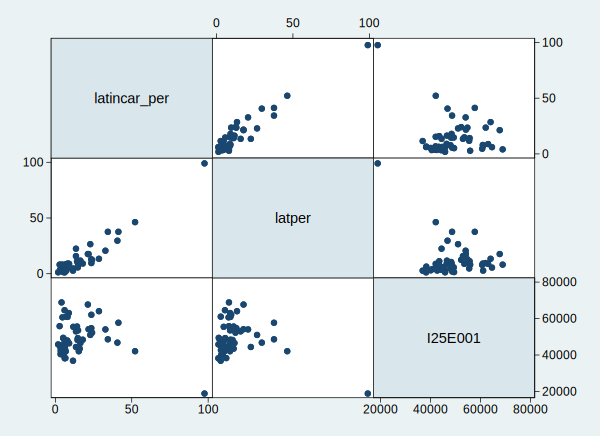

In [104]:
graph matrix latincar_per latper medhhinc

It looks like there are an outlier. Let's zoom in and label

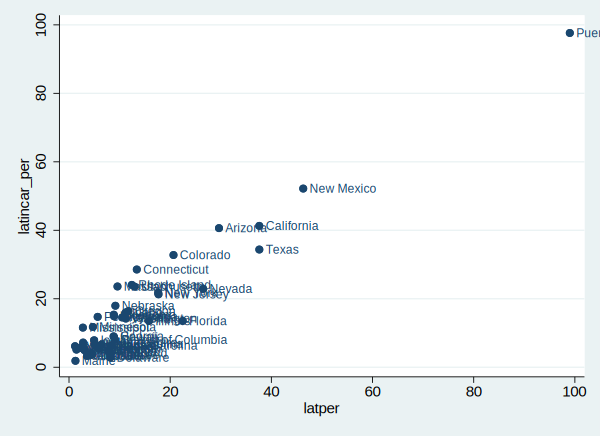

In [105]:
scatter latincar_per latper, mlabel(state)

Puerto Rico is definitively a outlier. Makes sense for Latinx population. 

## Independence, Sample variation of nonzero assumptions, & Zero conditional mean
These assumptions need to be evaluated by thinking through the data collection. Sometimes you need to control for spatial, temporal, or group autocorrelation.

## Normality
To assess normality, you can use a Q-Q plot (quantile-quantile plot). 

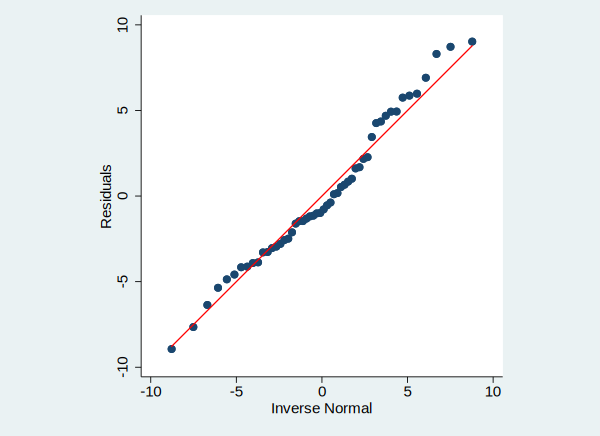

In [106]:
qnorm r_1, rlopts(lcolor(red)) aspect(1)

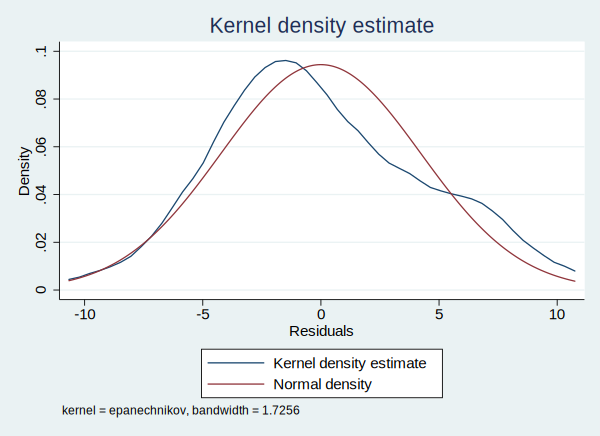

In [107]:
kdensity r_1, normal

In [108]:
swilk r_1


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
         r_1 |         52    0.97384      1.269     0.509    0.30534


We fail to reject the hypothesis that residuals are normally distribution.

## Homoscedasticity
One way to examine is to look visually at the residuals and fitted values.

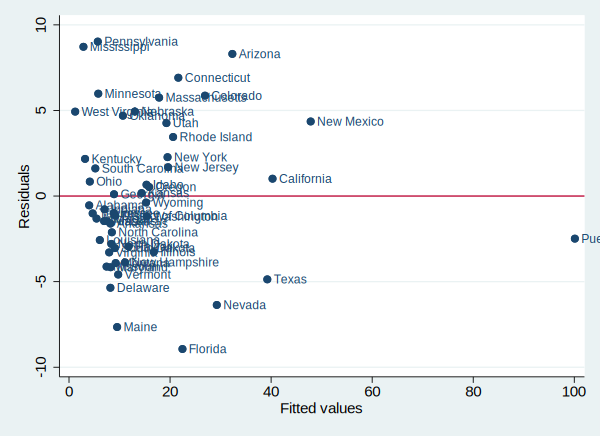

In [109]:
rvfplot, yline(0) mlabel(state)

In [110]:
estat imtest
estat hettest



Cameron & Trivedi's decomposition of IM-test

---------------------------------------------------
              Source |       chi2     df      p
---------------------+-----------------------------
  Heteroskedasticity |      36.52     32    0.2666
            Skewness |       8.40     11    0.6766
            Kurtosis |       1.24      1    0.2658
---------------------+-----------------------------
               Total |      46.16     44    0.3829
---------------------------------------------------


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of latincar_per

         chi2(1)      =     0.13
         Prob > chi2  =   0.7153


We fail to reject the hypothesis of constant variance (Homoscedasticity). Not much evidence of heterskedastcity.

## Multicollinearity
When indpendent variables are correlated with each and can predict each other. Variance inflation factor (VIF) is calculated by $\frac{1}{1-R^2}$ with each variable predicted on the other variables. The rule of thumb is for the the VIF is less than 10.

In [111]:
*VIF is a post-regress command
vif


    Variable |       VIF       1/VIF  
-------------+----------------------
      latper |      1.85    0.541033
    medhhinc |      1.80    0.556310
   eparegion |
          2  |      1.90    0.527167
          3  |      1.77    0.565193
          4  |      2.51    0.397624
          5  |      1.88    0.531659
          6  |      1.93    0.518559
          7  |      1.65    0.605833
          8  |      1.84    0.544323
          9  |      1.72    0.582766
         10  |      1.46    0.683280
-------------+----------------------
    Mean VIF |      1.85


In [112]:
regress latincar_per latper medhhinc i.eparegion if state!="Puerto Rico"

predict r_2, residuals



      Source |       SS           df       MS      Number of obs   =        51
-------------+----------------------------------   F(11, 39)       =     22.58
       Model |  5558.09997        11  505.281815   Prob > F        =    0.0000
    Residual |  872.725462        39  22.3775759   R-squared       =    0.8643
-------------+----------------------------------   Adj R-squared   =    0.8260
       Total |  6430.82543        50  128.616509   Root MSE        =    4.7305

------------------------------------------------------------------------------
latincar_per |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      latper |   1.081151   .0890997    12.13   0.000     .9009294    1.261372
    medhhinc |  -.0000967   .0001242    -0.78   0.441    -.0003478    .0001545
             |
   eparegion |
          2  |  -5.422238   3.455379    -1.57   0.125     -12.4114    1.566925
          3  |  -8.

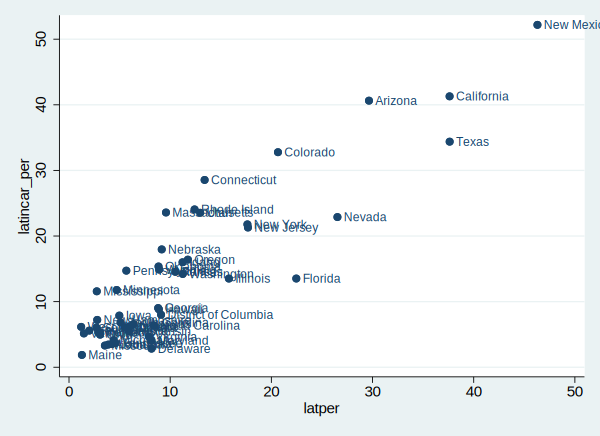

In [113]:
*Linearity
scatter latincar_per latper if state!="Puerto Rico", mlabel(state)

In [114]:
*Normality
swilk r_2

*Homoscedasticity
estat imtest
estat hettest

*Multicollinearity
vif



                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
         r_2 |         52    0.96225      1.831     1.293    0.09801


Cameron & Trivedi's decomposition of IM-test

---------------------------------------------------
              Source |       chi2     df      p
---------------------+-----------------------------
  Heteroskedasticity |      37.28     32    0.2391
            Skewness |      10.32     11    0.5016
            Kurtosis |       0.09      1    0.7676
---------------------+-----------------------------
               Total |      47.69     44    0.3251
---------------------------------------------------


Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of latincar_per

         chi2(1)      =     1.14
         Prob > chi2  =   0.2866


    Variable |  

|  | With every state | Excludes Puerto Rico |
| --- | --- | --- | 
| Latinx (%) | .992 (.058)*** | 1.081 (.089)*** | 
| Median household income | .000 (.000) | -.000 (.000) |
| Region 1 | ref | ref | 
| Region 2 | -6.289 (3.420) | -5.422 (3.455) | 
| Region 3 | -8.201 (2.755)** | -8.204 (2.731)** | 
| Region 4 | -8.096 (2.908)** | -9.542 (3.090)** |
| Region 5 | -7.190 (2.840)* | -7.881 (2.865)** |
| Region 6 | -6.365 (3.117)* | -8.908 (3.655)* |
| Region 7 | -4.344 (3.190) | -5.223 (3.234) |
| Region 8 | -1.881 (2.807) | -2.605 (2.838) |
| Region 9 | -5.361 (3.253) | -7.147 (3.505)* |
| Region 10 | -4.051 (3.433) | -5.182 (3.513) |
| intercept | 8.084 (5.983) | 13.087 (7.067) | 
| R-squ | 93.19% | 86.43% |

Note: *** p<.001; **p <.01; p <.05

Our model estimates the following model: 

$\hat{y} = \beta_0 + \beta_1*(latper_i) + \beta_2*(medhhinc_i) +\beta_3*(region1_i)+\beta_4*(region2_i) +\beta_5(region3_i) +\beta_6*(region4_i) +\beta_7*(region5_i) +\beta_8*(region6_i) +\beta_9*(region7_i) +\beta_10*(region8_i) +\beta_11*(region9_i) +\beta_12*(region10_i)$

$\hat{y} = 8.084027 + .9924154*(latper_i) + .00000388*(medhhinc_i) +1*(region1_i)-6.288965*(region2_i) -8.200945(region3_i) -8.095685*(region4_i) -7.190414*(region5_i) -6.36532*(region6_i) -4.343998*(region7_i) -1.880735*(region8_i) -5.360627*(region9_i) -4.050782*(region10_i)$

We can estimate predicted values based on our model and that gives us more tangible explanations of our findings

yhat are the specific estimates using the model and pluging in each osbervation

In [125]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
use "incar_race_inc 4 16 25.dta", clear
quietly regress latincar_per latper medhhinc i.eparegion
predict yhat
list state yhat latincar_per latper medhhinc eparegion in 1 


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data



(option xb assumed; fitted values)
(1 missing value generated)


     +----------------------------------------------------------------+
     |   state       yhat   latinc~r     latper   medhhinc   epareg~n |
     |----------------------------------------------------------------|
  1. | Alabama   3.998943   3.455813   3.883101      40474          4 |
     +----------------------------------------------------------------+


In [124]:
di 8.084027 + .9924154*(3.883101)+ .00000388*(40474) +1*(0)-6.288965*(0) -8.200945*(0) -8.095685*(1) -7.190414*(0) -6.36532*(0) -4.343998*(0) -1.880735*(0) -5.360627*(0) -4.050782*(0)

3.9990304


Our model estimates for obsevration 1 (Alabama) a 3.999% Latinx incarceration rate. The actual value is 3.456%.

You can plug in other values to make estimates.


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data



      Source |       SS           df       MS      Number of obs   =        52
-------------+----------------------------------   F(11, 40)       =     49.74
       Model |  12456.4059        11  1132.40053   Prob > F        =    0.0000
    Residual |  910.662272        40  22.7665568   R-squared       =    0.9319
-------------+----------------------------------   Adj R-squared   =    0.9131
       Total |  13367.0681        51  262.099375   Root MSE        =    4.7714

------------------------------------------------------------------------------
latincar_per |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      latper |   .9924154   .0578919    17.14   0.000     .8754116    1.109419
    medhhinc |   3.88e-06   .0000981     0.04   0.969    -.0001943    .0002021
             |
   eparegion |
          2  |  -6.288965   3.41999

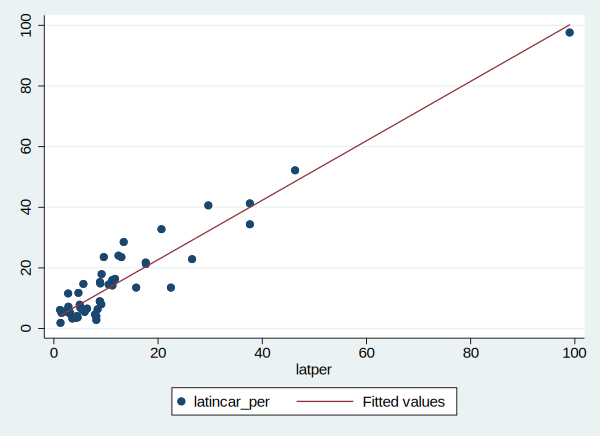

In [118]:
twoway ///
    (scatter latincar_per latper) ///
    (lfit yhat latper)

In [ ]:
* Bonus storing regression results to excel table

In [6]:
cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data"
use "incar_race_inc 4 16 25.dta", clear

quietly regress latincar_per latper medhhinc i.eparegion
matrix table = r(table)
matrix list table

matrix b = table[1, 1..9]'
matrix se = table[2, 1..9]'
matrix pvalue = table[4, 1..9]'

cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\results"
putexcel set "workbook2 myresults", sheet("Model1") modify
putexcel C1="Coef." A2=matrix(b), rownames nformat(number_d2)
putexcel D1="SE" D2=matrix(se)
putexcel E1="p-value" E2=matrix(pvalue)

quietly regress latincar_per latper medhhinc i.eparegion if state!="Puerto Rico"
matrix table = r(table)
matrix list table

matrix b = table[1, 1..9]'
matrix se = table[2, 1..9]'
matrix pvalue = table[4, 1..9]'

cd "D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\results"
putexcel set "workbook2 myresults", sheet("Model2") modify
putexcel C1="Coef." A2=matrix(b), rownames nformat(number_d2)
putexcel D1="SE" D2=matrix(se)
putexcel E1="p-value" E2=matrix(pvalue)


D:\documents copy\teaching\SOCG 206 spring 2025\jupyter\data





table[9,13]
                                        1b.          2.          3.          4.
            latper    medhhinc   eparegion   eparegion   eparegion   eparegion
     b   .99241541   3.878e-06           0  -6.2889653  -8.2009448   -8.095685
    se   .05789188   .00009807           .   3.4199952   2.7548475   2.9083252
     t   17.142566   .03953958           .  -1.8388813  -2.9769142  -2.7836244
pvalue   4.946e-20   .96865689           .   .07336482   .00492418   .00816869
    ll   .87541156  -.00019434           .  -13.201033  -13.768699  -13.973629
    ul   1.1094193   .00020209           .   .62310288  -2.6331902  -2.2177406
    df          40          40          40          40          40          40
  crit   2.0210754   2.0210754   2.0210754   2.0210754   2.0210754   2.0210754
 eform           0           0           0           0           0           0

                 5.          6.          7.       